In [338]:
"""The project should have at least the following components:

1. An open source license.
2. A class that you have defined and an derived class that inherits from this parent class. The classes can be simple, but you should have at least a useful ``__str__`` method.
3. Data permanence using a database (e.g. SQLite, MySQL, or MongoDB) or some form of data serialization (e.g. JSON).
4. A user interface. This could be a web application (such as Flask or Django); an application built with pyQT4 or wxWindows; an Jupyter notebook with widgets; or a command line interface.
5. Some sort of visualization. This can be a static matplotlib-generated figure or an interactive plot with Bokeh or mpld3.
6. A detailed README.md that describes the problem your project is addressing including any domain knowledge that will help someone (me) outside of your expertise appreciate the intent of the project, provides a description of the dependencies (any install instructions), instructions on how to use the project with example use cases.
7. The project should be well written Python program that follows Google’s Python style guide.
8. Create a separate git (e.g. Bitbucket or GitHub) repository for the project."""

'The project should have at least the following components:\n\n1. An open source license.\n2. A class that you have defined and an derived class that inherits from this parent class. The classes can be simple, but you should have at least a useful ``__str__`` method.\n3. Data permanence using a database (e.g. SQLite, MySQL, or MongoDB) or some form of data serialization (e.g. JSON).\n4. A user interface. This could be a web application (such as Flask or Django); an application built with pyQT4 or wxWindows; an Jupyter notebook with widgets; or a command line interface.\n5. Some sort of visualization. This can be a static matplotlib-generated figure or an interactive plot with Bokeh or mpld3.\n6. A detailed README.md that describes the problem your project is addressing including any domain knowledge that will help someone (me) outside of your expertise appreciate the intent of the project, provides a description of the dependencies (any install instructions), instructions on how to use

In [52]:
import pandas as pd
from pandas import Series, DataFrame, Panel
import dateutil
from dateutil.parser import*
import datetime
from datetime import timedelta
from dateutil.relativedelta import *
import math
import random
import ipywidgets as widgets
from ipywidgets import Button, Layout, interact
from IPython.display import Javascript, display
import numbers
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import gspread
import matplotlib.pyplot as plt

In [53]:
class malady(object): 
    """
    malady class. 
    """
    def __init__(self, name = "Headache",
                 onset = "DEC 25, 2016",
                 severity = 'a lot'):
        
        self.name = name
        self.onset = onset
        self.severity = severity
    
class headache(malady):
    """
    Headache class.
    """
    def __init__(self, onset, severity, end, **kwargs):
        super().__init__("Headache", onset, severity)

        self.end = end
        self.health_data = kwargs
        
    def __str__(self):
        return self.name + " started " + str(self.onset) + " it was " + str(self.severity) + " painful. It ended at " + str(self.end)
     

In [54]:
    #initiate the management of the csv file
    x = 0
    #define indexes and values for my widgets
    months = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,'Oct':10, 'Nov':11, 'Dec':12}
    days = list(range(1,32))
    year = list(range(2017, 2027))
    hour = {'12:00 am':24, '1:00 am':1, '2:00 am':2, '3:00 am':3, '4:00 am':4, '5:00 am':5, 
                            '6:00 am':6, '7:00 am':7, "8:00 am":8, '9:00 am':9, '10:00 am':10, 
                             '11:00 am':11, '12:00 pm':12, '1:00 pm':13, '2:00 pm':14, '3:00 pm':15,
                             '4:00 pm':16, '5:00 pm':17, '6:00 pm':18, '7:00 pm':19, '8:00 pm':20, 
                             '9:00 pm':21, '10:00 pm':22, '11:00 pm':23}    
    total_hours = list(range(0, 12))  
    today_date = datetime.date.today()
    today_date = today_date.strftime("%A %B %d, %Y")


In [55]:
    #widgets
    pain = widgets.SelectionSlider(
        options=['none', 'a little', 'medium', 'a lot'],
        value='none',
        description='Pain level',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',    
        readout=True
    )


    get_key_month =sorted(months, key=months.__getitem__)
    mn = widgets.Dropdown(
        options = get_key_month,
        value= 'Jan',
        description='Month:',
    )


    dy = widgets.Dropdown(
        options = days,
        value= 1,
        description='Day:',
    )

    yr = widgets.Dropdown(
        options = year,
        value= 2017,
        description='Year:',
    )


    get_key_hour =sorted(hour, key=hour.__getitem__)
    options = get_key_hour
    duration = widgets.SelectionRangeSlider(
        options=get_key_hour,
        value=('1:00 am','12:00 am'),
        description='Duration',
        width = '100%',
        disabled=False,
        layout=Layout(width='50%', height='80px')
    )


    screen = widgets.IntSlider(
        value=0,
        min=0,
        max=12,
        step=1,
        description='ScreenHours:', 
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
    )

    glasses = widgets.Checkbox(
        value=False,
        description='Did you wear glasses?',
        disabled=False
    )

    food = widgets.Checkbox(
        value=False,
        description='Did you eat?',
        disabled=False
    )

    meds = widgets.Checkbox(
        value=False,
        description='Did you take medicine?',
        disabled=False
    )


    car = widgets.Checkbox(
        value=False,
        description='Long car ride?',
        disabled=False
    )

    display("Autumn's Headache Tracker")
    display(today_date)
    display(mn, dy, yr, duration, pain, screen, glasses, food, car, meds)

    def run_all(ev):
        """Run all of the cells below this cell"""
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

    button = widgets.Button(description="Save")
    button.on_click(run_all)
    display(button)

<IPython.core.display.Javascript object>

"Autumn's Headache Tracker"

'Thursday December 21, 2017'

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [56]:
    #format the output of the widgets
    dur_a = duration.value[0]
    dur_b = duration.value[1]
    dur_b = dateutil.parser.parse(dur_b)
    dur_a = dateutil.parser.parse(dur_a)
    dur_hours = dur_b-dur_a
    dur_hours = dur_hours/timedelta(hours=1)
    headache_date = datetime.date(month = months.get(mn.value), day = dy.value, year = yr.value)
    record_date = str(yr.value)+("-")+(mn.value)+("-")+str(dy.value)

    if pain.value == "none":
        pain_scalar = 0
    elif pain.value == "a little":
        pain_scalar = 1
    elif pain.value == "medium":
        pain_scalar = 2    
    elif pain.value == "a lot":
        pain_scalar = 3

    def boolean_to_num(value):
        """Takes a boolean result and returns a zero or a one"""
        if value == True:
            value_num = 1
        else: value_num = 0
        return value_num
    #print(boolean_to_num(glasses.value))
        
    record_date = dateutil.parser.parse(record_date)
    today = {"month":mn.value, "day":dy.value, "year":yr.value, "start_time":dur_a, "stop_time":dur_b,
             "how_long":dur_hours,"pain":pain.value, "screen":screen.value, "glasses":glasses.value, 
             "food":food.value,"car":car.value, "meds":meds.value}
    recent_headache = headache(headache_date, pain.value, dur_hours, **today)  


In [57]:
    #Put the widget data into a csv file.
    df = pd.DataFrame(recent_headache.health_data, columns = ["month","day","year","start_time", "stop_time",
                                                              "how_long","pain", "screen", "glasses", "food",
                                                              "car", "meds"], index = (range(1,2)))
    df = df[0:0]
    if x <= 0:
        with open('Headache_log.csv', 'a') as f:
            df.to_csv(f, mode='w', header=True, index = False)
    else:
        with open('Headache_log.csv', 'a') as f:
            df.to_csv(f, mode='w', header=False, index = False)
    x = x + 1

    df.loc[-1] = recent_headache.health_data  # adding a row
    df.index = df.index + 1  # shifting index
    df = df.sort_index()  # sorting by index
  

In [58]:
    #view of the csv input for checking and debugging purposes
    df

,month,day,year,start_time,stop_time,how_long,pain,screen,glasses,food,car,meds
0,Jan,1,2017,2017-12-21 01:00:00,2017-12-21,-1.0,none,0,False,False,False,False


In [59]:
    #with open('Headache_log.csv', 'a') as f:
        #df.to_csv(f, mode='a', header=False, index=False)

In [60]:
    #dfc =pd.read_table("Headache_log.csv")
    #print(dfc)

In [61]:
    # use creds to create a client to interact with the Google Drive API
    scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
    creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
    client = gspread.authorize(creds)
 
    # Find the workbook and open the first sheet
    sheet = client.open("Headache_log").sheet1

    row = [record_date, mn.value, dy.value, yr.value, dur_a, dur_b, dur_hours, pain.value,pain_scalar, 
       screen.value, glasses.value, food.value, car.value, meds.value]
    index = 1
    sheet.insert_row(row, index) 

    #Extract and print all of the values
    #headache_data = sheet.get_all_records()
    #print(headache_data)

In [62]:
    #Google sheets returns series in random order and header rows are not preserved with appending, 
    #so series are retrieved seperately, named and concantenated.

    #dataframe = pd.DataFrame(sheet.get_all_records())
    df_glasses = pd.DataFrame(sheet.col_values(11))
    df_glasses.columns = ["glasses"]
    df_pain_s = pd.DataFrame(sheet.col_values(8)).dropna()
    df_pain_s.columns = ["pain_scalar"]
    df_eat = pd.DataFrame(sheet.col_values(12))
    df_eat.columns = ["food"]
    df_car = pd.DataFrame(sheet.col_values(13))
    df_car.columns = ["car"]
    df_meds = pd.DataFrame(sheet.col_values(14))
    df_meds.columns = ["meds"]
    df_screen = pd.DataFrame(sheet.col_values(10))
    df_screen.columns = ["screen"]
    df_record_date = pd.DataFrame(sheet.col_values(1)).dropna()
    df_record_date.columns = ["record_date"]

    #new dataframes for charts
    df_date_pain = pd.concat([df_record_date, df_pain_s], axis = 1).dropna()
    df_date_pain.columns = ["rdate", "painn"]
    df_factors = pd.concat([df_pain_s,df_glasses, df_eat, df_car, df_meds], axis = 1).dropna()
    df_factors.columns = ["pain","wore_glasses","foods","car_ride","tylenol"]

    #these are the names andnumbers of the columns: record_date1, mn.value2, dy.value3, yr.value4, 
    #dur_a5, dur_b6, dur_hours7, pain.value8,pain_scalar9, screen.value10, glasses.value11, food.value12,
    #car.value13, meds.value14, gnum15, fnum16, cnum17, mnum18]
    #dataframe.columns = ["how_long","screen","day","start_time", "stop_time","year","record_date","meds", 
    #"month", "pain", "pain_scalar","glasses", "car","eat"]

In [63]:
#pandas grouping for charts
group = df_factors.groupby(["pain","wore_glasses"])
group_sorted = group.size().unstack()

groupr = df_factors.groupby(["pain","car_ride"])
groupr_sorted = groupr.size().unstack()
groupf = df_factors.groupby(["pain","foods"])
groupf_sorted = groupf.size().unstack()
groupm = df_factors.groupby(["pain","tylenol"])
groupm_sorted = groupm.size().unstack()

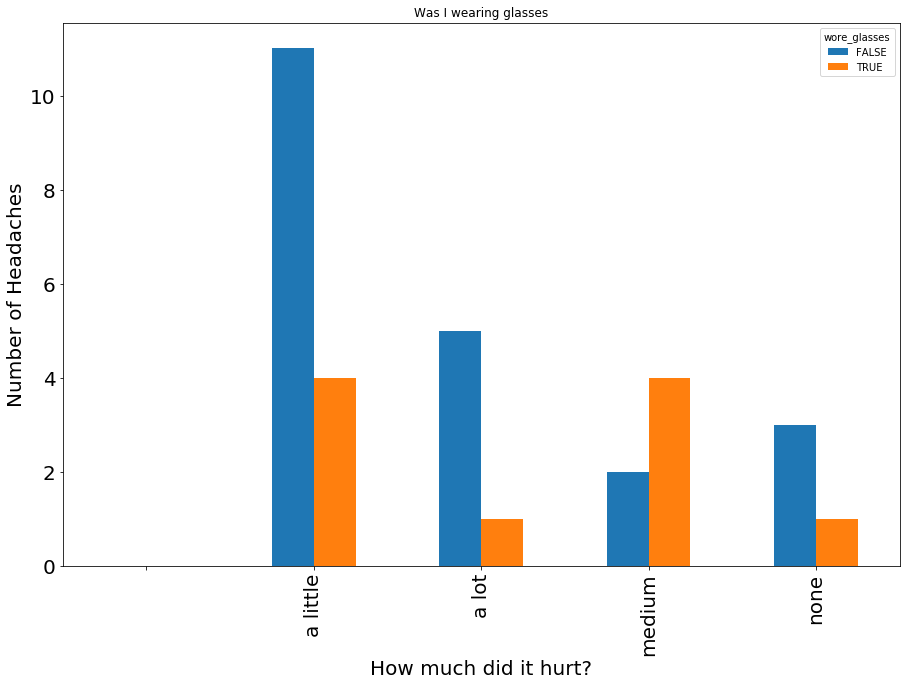

In [64]:
     # charts
ax = group_sorted[['FALSE','TRUE']].plot(kind='bar', title ="Was I wearing glasses", figsize=(15, 10), legend=True, fontsize=20)
ax.set_xlabel("How much did it hurt?", fontsize=20)
ax.set_ylabel("Number of Headaches", fontsize=20)
plt.show()

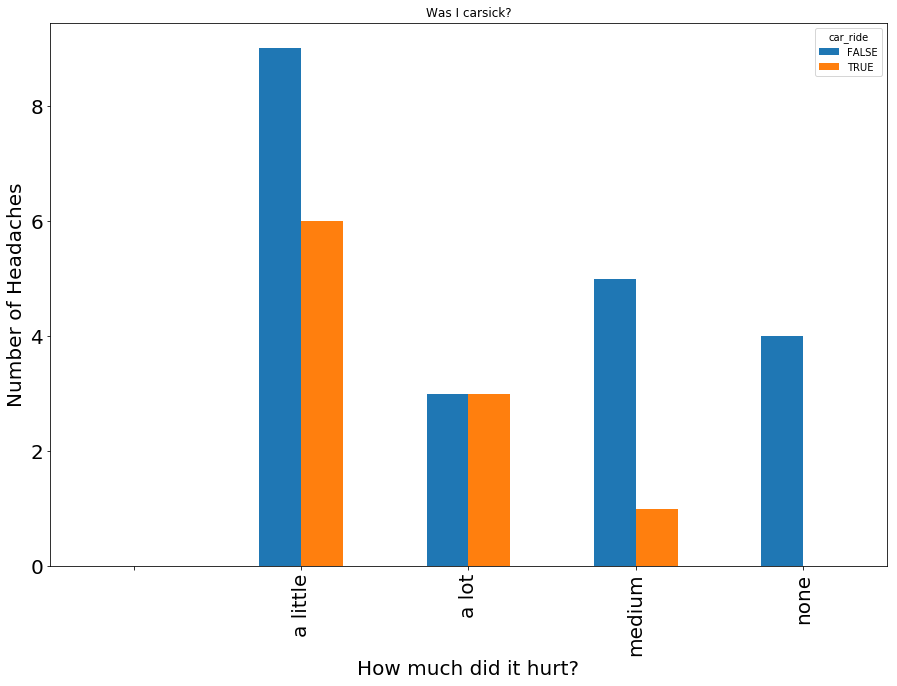

In [65]:
bx = groupr_sorted[['FALSE','TRUE']].plot(kind='bar', title ="Was I carsick?", figsize=(15, 10), legend=True, fontsize=20)
bx.set_xlabel("How much did it hurt?", fontsize=20)
bx.set_ylabel("Number of Headaches", fontsize=20)
plt.show()

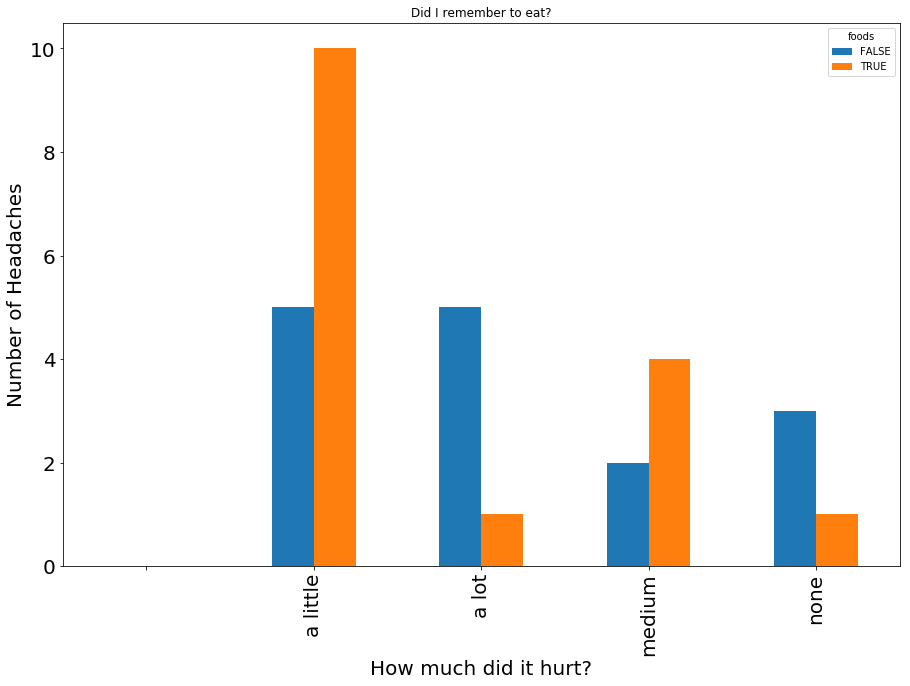

In [66]:
cx = groupf_sorted[['FALSE','TRUE']].plot(kind='bar', title ="Did I remember to eat?", figsize=(15, 10), legend=True, fontsize=20)
cx.set_xlabel("How much did it hurt?", fontsize=20)
cx.set_ylabel("Number of Headaches", fontsize=20)
plt.show()

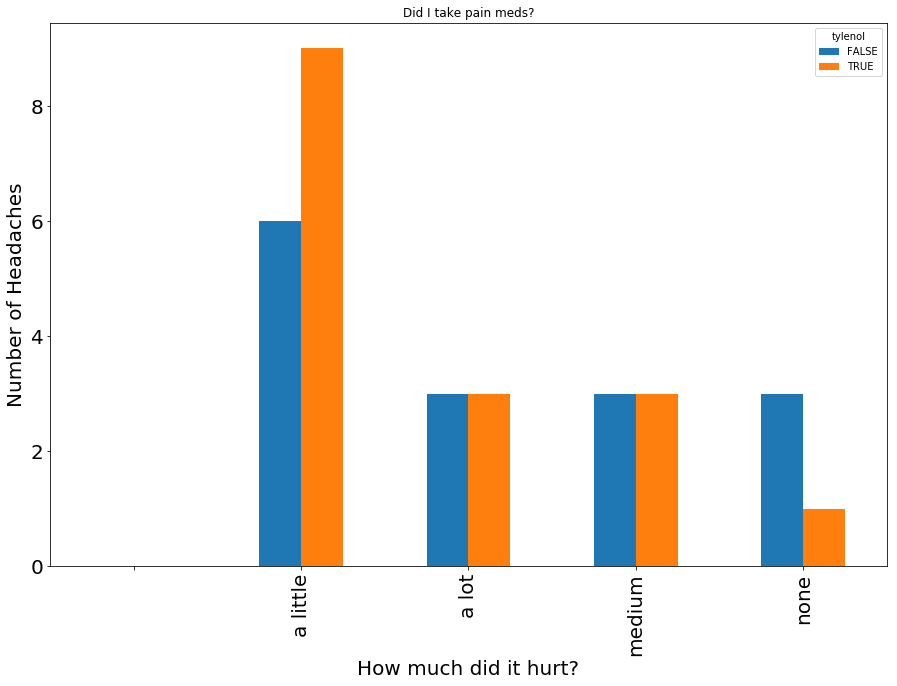

In [67]:
mx = groupm_sorted[['FALSE','TRUE']].plot(kind='bar', title ="Did I take pain meds?", figsize=(15, 10), legend=True, fontsize=20)
mx.set_xlabel("How much did it hurt?", fontsize=20)
mx.set_ylabel("Number of Headaches", fontsize=20)
plt.show()

In [68]:
    #clear out the csv data frame 
    df = df[0:0]